In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('data/Kickstarter000.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3779 entries, 0 to 3778
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   backers_count             3779 non-null   int64  
 1   blurb                     3779 non-null   object 
 2   category                  3779 non-null   object 
 3   converted_pledged_amount  3779 non-null   int64  
 4   country                   3779 non-null   object 
 5   created_at                3779 non-null   int64  
 6   creator                   3779 non-null   object 
 7   currency                  3779 non-null   object 
 8   currency_symbol           3779 non-null   object 
 9   currency_trailing_code    3779 non-null   bool   
 10  current_currency          3779 non-null   object 
 11  deadline                  3779 non-null   int64  
 12  disable_communication     3779 non-null   bool   
 13  friends                   8 non-null      object 
 14  fx_rate 

In [4]:
toDrop = ['currency_symbol','urls','source_url','currency_trailing_code']
df.drop(toDrop,axis=1)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,current_currency,deadline,...,pledged,profile,slug,spotlight,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,usd_type
0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",802,US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,USD,1391899046,...,802.0,"{""id"":822687,""project_id"":822687,""state"":""inac...",new-final-round-album,True,False,successful,1391899046,1.000000,802.00000,international
1,97,An adorable fantasy enamel pin series of princ...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",2259,US,1549659768,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,USD,1551801611,...,2259.0,"{""id"":3665299,""project_id"":3665299,""state"":""in...",princess-pals-enamel-pin-series,True,False,successful,1551801611,1.000000,2259.00000,international
2,88,Helping a community come together to set the s...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",29638,US,1477242384,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",USD,USD,1480607930,...,29638.0,"{""id"":2730508,""project_id"":2730508,""state"":""in...",their-life-through-their-lens-the-amish-and-me...,True,True,successful,1480607932,1.000000,29638.00000,international
3,193,Every revolution starts from the bottom and we...,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",49158,IT,1540369920,"{""id"":1569700626,""name"":""WAO"",""slug"":""wearewao...",EUR,USD,1544309940,...,43180.0,"{""id"":3498742,""project_id"":3498742,""state"":""ac...",wao-the-eco-effect-shoes,True,False,successful,1544309940,1.136525,49075.15252,international
4,20,Learn to build 10+ Applications in this comple...,"{""id"":51,""name"":""Software"",""slug"":""technology/...",549,US,1425706517,"{""id"":1870845385,""name"":""Kalpit Jain"",""is_regi...",USD,USD,1428511017,...,549.0,"{""id"":1754403,""project_id"":1754403,""state"":""in...",apple-watch-development-course,False,False,failed,1428511019,1.000000,549.00000,domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,10,"This is a collaborative effort at recording, m...","{""id"":316,""name"":""Blues"",""slug"":""music/blues"",...",506,US,1454527113,"{""id"":1000214737,""name"":""Penny D Marcucci"",""is...",USD,USD,1459716418,...,506.0,"{""id"":2355459,""project_id"":2355459,""state"":""in...",the-penny-d-project,False,False,failed,1459716419,1.000000,506.00000,domestic
3775,472,Get your own Mimic Chest containing dice vault...,"{""id"":270,""name"":""Gaming Hardware"",""slug"":""gam...",75790,US,1506288614,"{""id"":1342562240,""name"":""Polymorph Crafts"",""sl...",USD,USD,1510934334,...,75790.0,"{""id"":3153028,""project_id"":3153028,""state"":""ac...",the-mimic-chest-your-rpg-carry-all-with-dice-t...,True,False,successful,1510934334,1.000000,75790.00000,international
3776,35,"A new animated, workplace comedy series about ...","{""id"":29,""name"":""Animation"",""slug"":""film & vid...",2346,US,1336120969,"{""id"":765327036,""name"":""Daran Carlin-Weber"",""i...",USD,USD,1339046590,...,2346.0,"{""id"":174185,""project_id"":174185,""state"":""inac...",summer-rec-pilot-episode,False,False,failed,1339046590,1.000000,2346.00000,international
3777,13,a thesis film following the emotional life of ...,"{""id"":32,""name"":""Shorts"",""slug"":""film & video/...",1901,US,1537154407,"{""id"":1521393087,""name"":""Carolyn Ramella"",""is_...",USD,USD,1543349869,...,1901.0,"{""id"":3472030,""project_id"":3472030,""state"":""in...",its-not-about-you-undergraduate-student-thesis...,True,False,successful,1543349869,1.000000,1901.00000,international


## What is the difference between converted_pledged_amount and usd_pledged?

In [5]:
t = df[['converted_pledged_amount','usd_pledged','static_usd_rate']]

In [6]:
a = t.usd_pledged * t.static_usd_rate
a.name = 'a'

In [7]:
test = pd.merge(t, a, right_index = True,
               left_index = True)

In [8]:
c= (test.a - test.usd_pledged).to_frame()


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

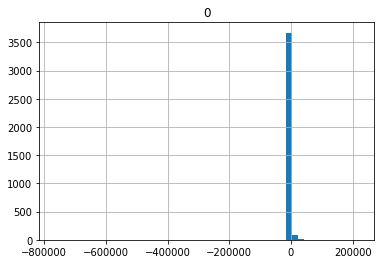

In [9]:
c.hist(bins=50)

## Extract information out of column "category"

In [10]:
g=df.category

In [11]:
import ast

In [12]:
cat = list(df.category)

In [13]:
dl = list(map(ast.literal_eval,cat))

In [14]:
df_cat = pd.DataFrame(dl)

In [15]:
df_cat.head()

,id,name,slug,position,parent_id,color,urls
0,43,Rock,music/rock,17,14.0,10878931,{'web': {'discover': 'http://www.kickstarter.c...
1,54,Mixed Media,art/mixed media,6,1.0,16760235,{'web': {'discover': 'http://www.kickstarter.c...
2,280,Photobooks,photography/photobooks,5,15.0,58341,{'web': {'discover': 'http://www.kickstarter.c...
3,266,Footwear,fashion/footwear,5,9.0,16752598,{'web': {'discover': 'http://www.kickstarter.c...
4,51,Software,technology/software,11,16.0,6526716,{'web': {'discover': 'http://www.kickstarter.c...


In [16]:
df_cat.drop('urls',axis=1,inplace=True)

<AxesSubplot:>

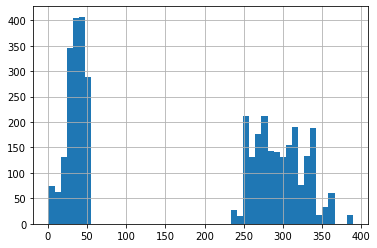

In [17]:
df_cat.id.hist(bins=50)

In [18]:
df_cat.head()

,id,name,slug,position,parent_id,color
0,43,Rock,music/rock,17,14.0,10878931
1,54,Mixed Media,art/mixed media,6,1.0,16760235
2,280,Photobooks,photography/photobooks,5,15.0,58341
3,266,Footwear,fashion/footwear,5,9.0,16752598
4,51,Software,technology/software,11,16.0,6526716


## Extract information out of column "profile"

In [19]:
pro = list(df.profile)

In [20]:
import re
ns = []
for s in pro[0:10]:
    tmp=re.sub('null|true|false|set|and',r'666',s)
    ns.append(tmp)

In [21]:
dl = list(map(ast.literal_eval,ns))

In [22]:
df_pro = pd.DataFrame(dl)

In [23]:
df_pro.head()

,id,project_id,state,state_changed_at,name,blurb,background_color,text_color,link_background_color,link_text_color,link_text,link_url,show_feature_image,background_image_opacity,should_show_feature_image_section,feature_image_attributes
0,822687,822687,inactive,1425915845,666,666,666,666,666,666,666,666,666,0.8,666,{'image_urls': {'default': 'https://ksr-ugc.im...
1,3665299,3665299,inactive,1549659768,666,666,666,666,666,666,666,666,666,0.8,666,{'image_urls': {'default': 'https://ksr-ugc.im...
2,2730508,2730508,inactive,1477242384,666,666,666,666,666,666,666,666,666,0.8,666,{'image_urls': {'default': 'https://ksr-ugc.im...
3,3498742,3498742,active,1544384546,WAO: THE ECO EFFECT SHOES,Every revolution starts from the bottom 666 we...,1ab8c5,ffffff,000000,,Follow along!,http://www.wearewao.com/en/home-blocks-2/,666,0.0,666,{'image_urls': {'default': 'https://ksr-ugc.im...
4,1754403,1754403,inactive,1425915896,666,666,666,666,666,666,666,666,666,0.8,666,{'image_urls': {'default': 'https://ksr-ugc.im...


In [24]:
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10 non-null     int64  
 1   project_id                         10 non-null     int64  
 2   state                              10 non-null     object 
 3   state_changed_at                   10 non-null     int64  
 4   name                               10 non-null     object 
 5   blurb                              10 non-null     object 
 6   background_color                   10 non-null     object 
 7   text_color                         10 non-null     object 
 8   link_background_color              10 non-null     object 
 9   link_text_color                    10 non-null     object 
 10  link_text                          10 non-null     object 
 11  link_url                           10 non-null     object 
 1

## Extract information out of column "creator"

In [41]:
cre = list(df.creator)

In [55]:
import re
ns = []
for s in cre[0:100]:
    tmp=re.sub('null|true|false|set|and',r'666',s)
    ns.append(tmp)

In [56]:
dl = list(map(ast.literal_eval,ns))

In [54]:
df_cre = pd.DataFrame(dl)

In [57]:
df_cre.head(10)

,id,name,is_registered,chosen_currency,avatar,urls,slug
0,1495925645,Daniel,666,666,{'thumb': 'https://ksr-ugc.imgix.net/as666s/00...,{'web': {'user': 'https://www.kickstarter.com/...,NaN
1,1175589980,Katherine,666,666,{'thumb': 'https://ksr-ugc.imgix.net/as666s/02...,{'web': {'user': 'https://www.kickstarter.com/...,freckleddisney
2,1196856269,MelissaThomas,666,666,{'thumb': 'https://ksr-ugc.imgix.net/as666s/01...,{'web': {'user': 'https://www.kickstarter.com/...,NaN
3,1569700626,WAO,666,666,{'thumb': 'https://ksr-ugc.imgix.net/as666s/02...,{'web': {'user': 'https://www.kickstarter.com/...,wearewao
4,1870845385,Kalpit Jain,666,666,{'thumb': 'https://ksr-ugc.imgix.net/as666s/00...,{'web': {'user': 'https://www.kickstarter.com/...,NaN
5,385711367,Jennifer Hawkyard,666,666,{'thumb': 'https://ksr-ugc.imgix.net/as666s/00...,{'web': {'user': 'https://www.kickstarter.com/...,jezhawk
6,160498270,Maceo Paisley,666,666,{'thumb': 'https://ksr-ugc.imgix.net/as666s/00...,{'web': {'user': 'https://www.kickstarter.com/...,maceopaisley
7,1188856672,Mike Evans,666,666,{'thumb': 'https://ksr-ugc.imgix.net/as666s/00...,{'web': {'user': 'https://www.kickstarter.com/...,lolnub
8,164923417,Michael,666,666,{'thumb': 'https://ksr-ugc.imgix.net/as666s/00...,{'web': {'user': 'https://www.kickstarter.com/...,NaN
9,1561008747,Nathan Hatch,666,666,{'thumb': 'https://ksr-ugc.imgix.net/as666s/00...,{'web': {'user': 'https://www.kickstarter.com/...,NaN


## Change unixtime into human readible time

In [25]:
# Import module
from datetime import datetime

#testing
date = datetime.utcfromtimestamp(1387659690)
print(date.strftime('%H:%M:%S'))
print(date)
print(date.year)
print(date.second)

21:01:30
2013-12-21 21:01:30
2013
30


In [30]:
# create function for format change
# we could also use lambda x: datetime.utcfromtimestamp(x)

def chg_date(x):
    return datetime.utcfromtimestamp(x)

In [31]:
# apply on dataframe

time_col = ['created_at','deadline','state_changed_at']
df[time_col] = df[time_col].applymap(chg_date)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3779 entries, 0 to 3778
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   backers_count             3779 non-null   int64         
 1   blurb                     3779 non-null   object        
 2   category                  3779 non-null   object        
 3   converted_pledged_amount  3779 non-null   int64         
 4   country                   3779 non-null   object        
 5   created_at                3779 non-null   datetime64[ns]
 6   creator                   3779 non-null   object        
 7   currency                  3779 non-null   object        
 8   currency_symbol           3779 non-null   object        
 9   currency_trailing_code    3779 non-null   bool          
 10  current_currency          3779 non-null   object        
 11  deadline                  3779 non-null   datetime64[ns]
 12  disable_communicatio

In [57]:
df[df.friends.isna()==False]

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
201,4,"Crafters of premium, all-natural beard care pr...","{""id"":9,""name"":""Fashion"",""slug"":""fashion"",""pos...",465,US,2019-01-09 17:53:41,"{""id"":101891251,""name"":""STAG BEARD PRODUCTS, L...",USD,$,True,...,help-stag-beard-products-open-our-second-mall-...,https://www.kickstarter.com/discover/categorie...,False,False,live,2019-03-11 16:00:13,1.000000,"{""api"":{""star"":""https://api.kickstarter.com/v1...",348.000000,NaN
368,140,Protecting your dog from air pollution one bre...,"{""id"":268,""name"":""Pet Fashion"",""slug"":""fashion...",11282,US,2019-01-30 17:50:15,"{""id"":1709961795,""name"":""Good Air Team"",""slug""...",USD,$,True,...,worlds-first-air-pollution-mask-for-dogs,https://www.kickstarter.com/discover/categorie...,False,False,live,2019-03-04 13:12:18,1.000000,"{""api"":{""star"":""https://api.kickstarter.com/v1...",8442.000000,NaN
382,3,An amazing nature inspired sterling silver sta...,"{""id"":267,""name"":""Jewelry"",""slug"":""fashion/jew...",362,HK,2019-03-06 00:42:23,"{""id"":353067058,""name"":""Morris"",""is_registered...",HKD,$,True,...,acacia-sterling-silver-and-diamonds-statement-...,https://www.kickstarter.com/discover/categorie...,False,False,live,2019-03-11 13:06:58,0.127384,"{""api"":{""star"":""https://api.kickstarter.com/v1...",271.074173,NaN
1343,91,A legacy cooperative board game featuring Hero...,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",5032,US,2018-12-28 15:49:30,"{""id"":1534064183,""name"":""Richard Saunders"",""is...",USD,$,True,...,sidekick-saga-a-cooperative-game-of-heroes-and...,https://www.kickstarter.com/discover/categorie...,False,False,live,2019-03-05 13:19:00,1.000000,"{""api"":{""star"":""https://api.kickstarter.com/v1...",5032.000000,domestic
1389,477,A roleplaying game about badass werewolves and...,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",18773,GB,2019-01-12 14:45:05,"{""id"":1122788890,""name"":""Josh Fox and Becky An...",GBP,£,False,...,bite-me-a-game-of-werewolf-pack-dynamics,https://www.kickstarter.com/discover/categorie...,False,False,live,2019-02-19 08:01:36,1.291389,"{""api"":{""star"":""https://api.kickstarter.com/v1...",12922.929920,NaN
2417,226,Idea generation cards for Sci-fi roleplaying g...,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",8817,NL,2019-03-03 11:44:48,"{""id"":1944346563,""name"":""LoreSmyth"",""slug"":""lo...",EUR,€,False,...,dungeon-discoveries-sci-fi-card-sets-for-rolep...,https://www.kickstarter.com/discover/categorie...,False,False,live,2019-03-04 19:47:11,1.136622,"{""api"":{""star"":""https://api.kickstarter.com/v1...",8853.148446,domestic
2454,66,Ultimate Tabletop Gaming App,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",2244,MX,2019-01-29 00:05:41,"{""id"":78780329,""name"":""Bicefalo Board Games"",""...",MXN,$,True,...,ultimate-tabletop-gaming-app,https://www.kickstarter.com/discover/categorie...,False,False,live,2019-02-19 16:03:58,0.051972,"{""api"":{""star"":""https://api.kickstarter.com/v1...",1591.335583,NaN
2469,4,"A Trading Card Game inspired by the Silent, Go...","{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",42,US,2019-01-30 07:43:55,"{""id"":2130740106,""name"":""HappyPlumz"",""slug"":""h...",USD,$,True,...,battle-toons-trading-card-game,https://www.kickstarter.com/discover/categorie...,False,False,live,2019-03-05 01:01:35,1.000000,"{""api"":{""star"":""https://api.kickstarter.com/v1...",42.000000,domestic
